Dijkstra's Algorithm Search Front Visualization:


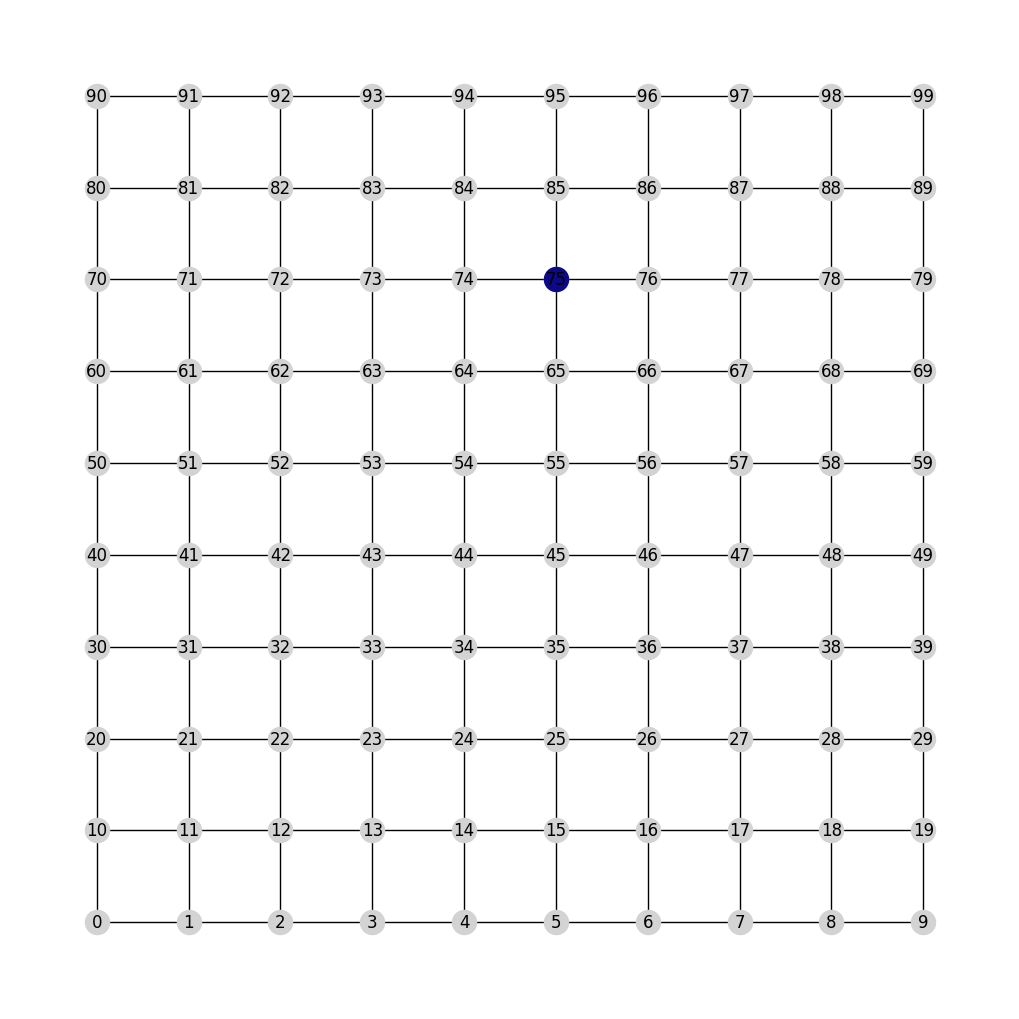

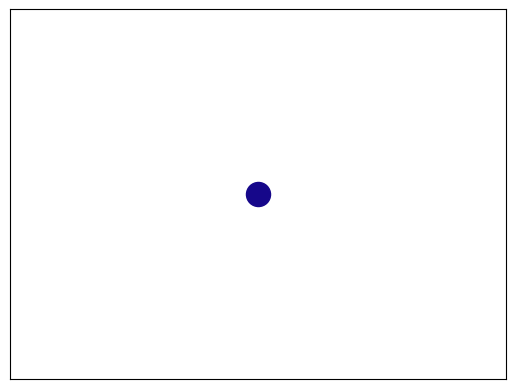

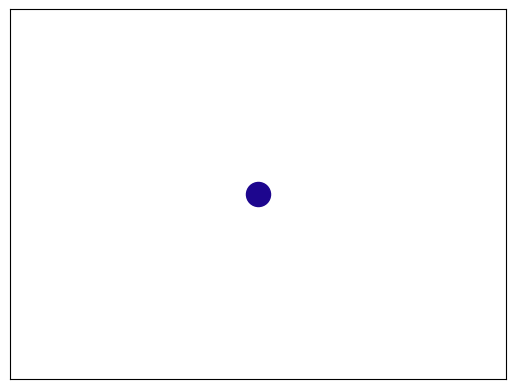

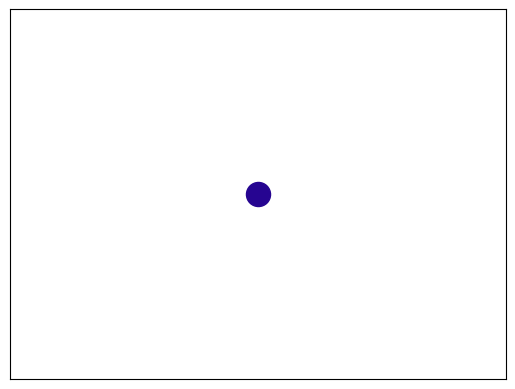

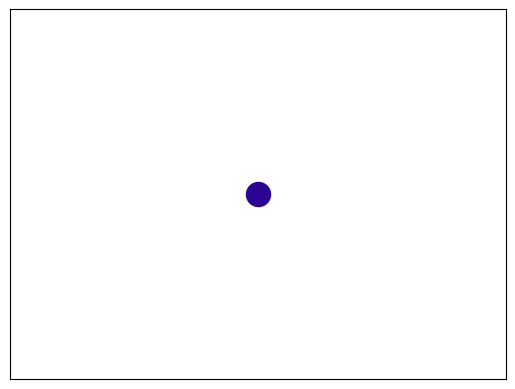

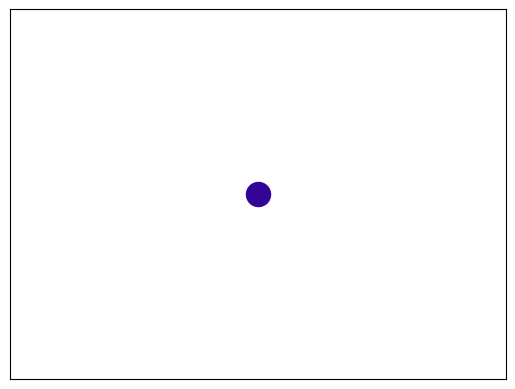

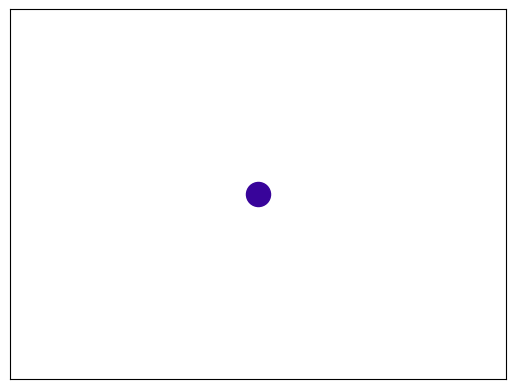

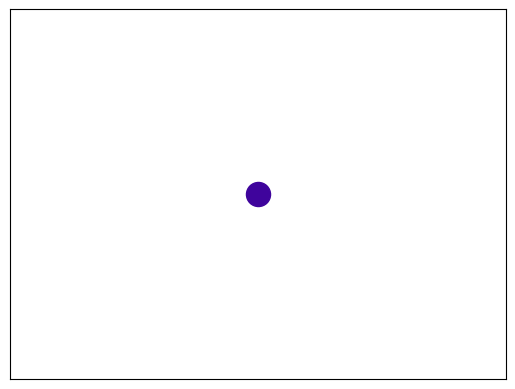

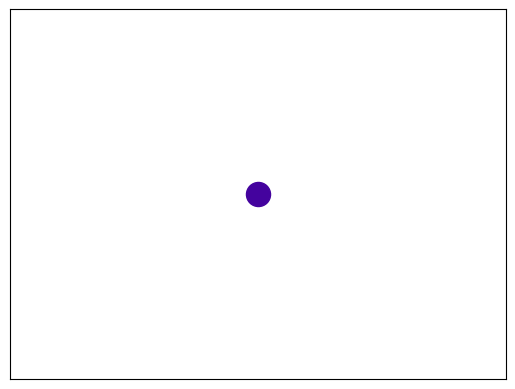

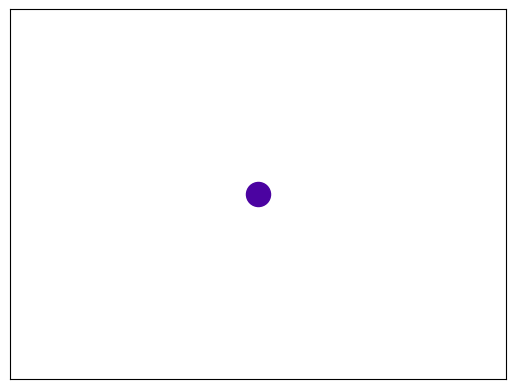

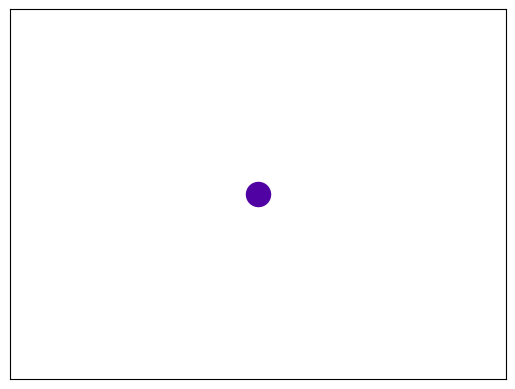

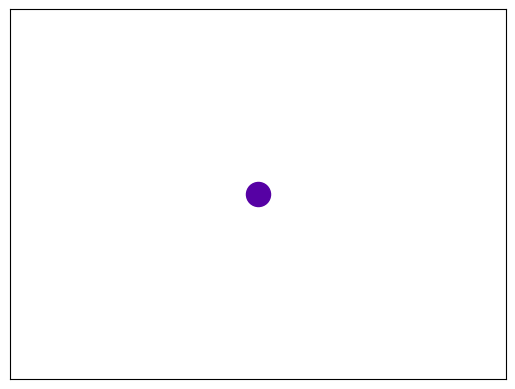

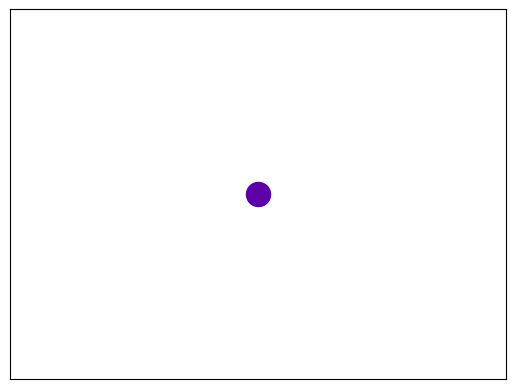

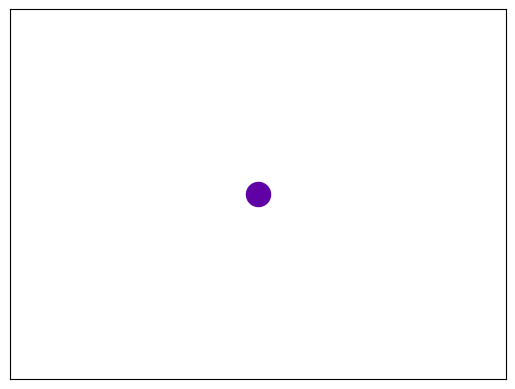

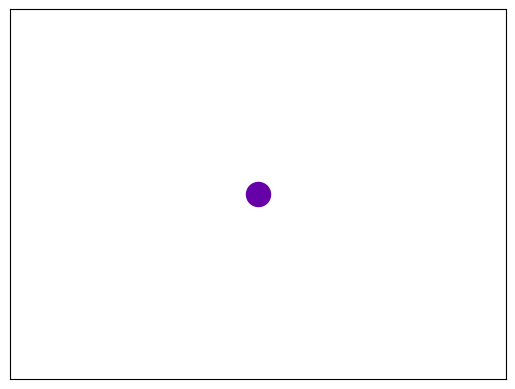

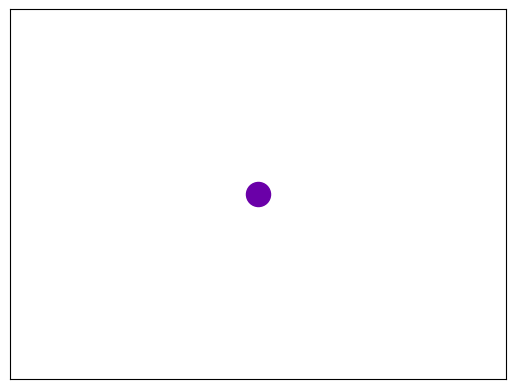

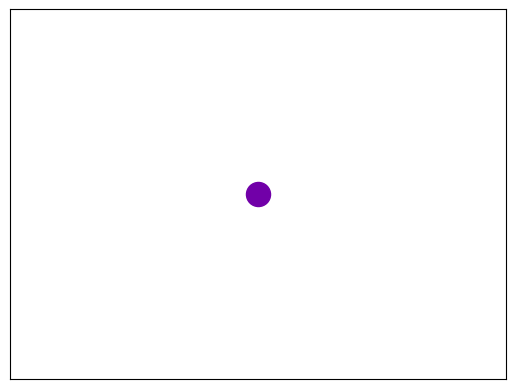

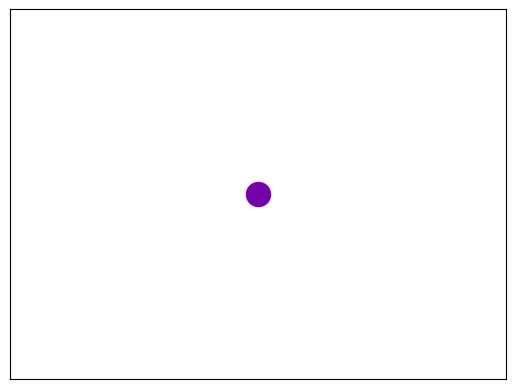

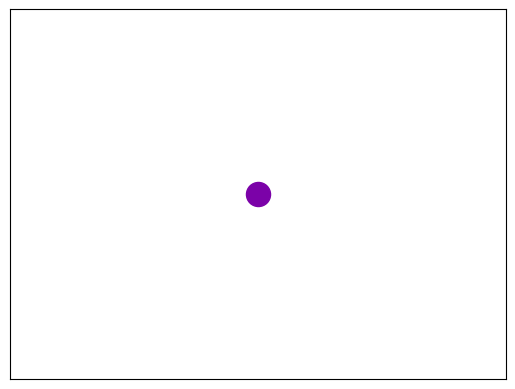

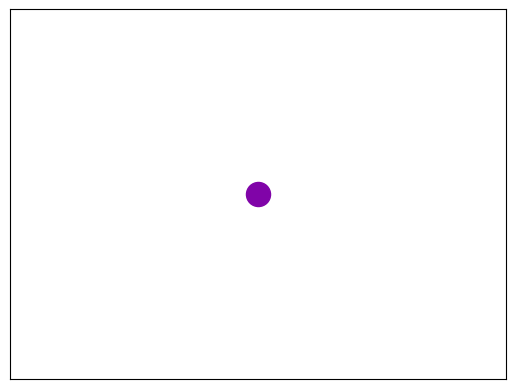

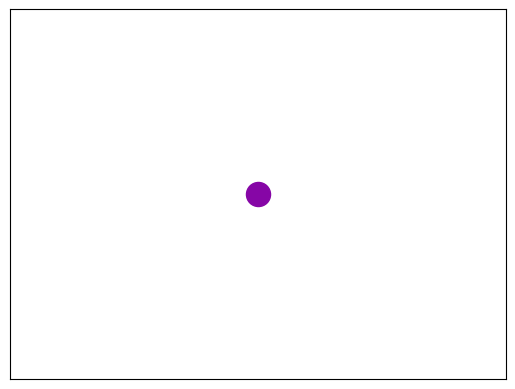

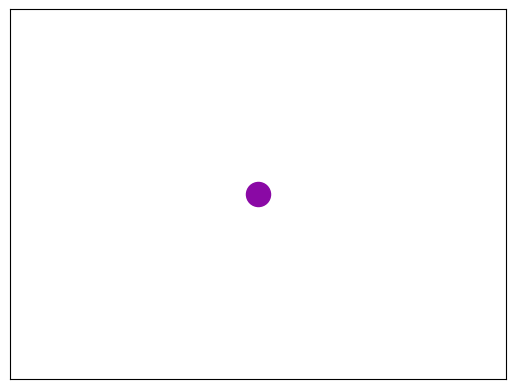

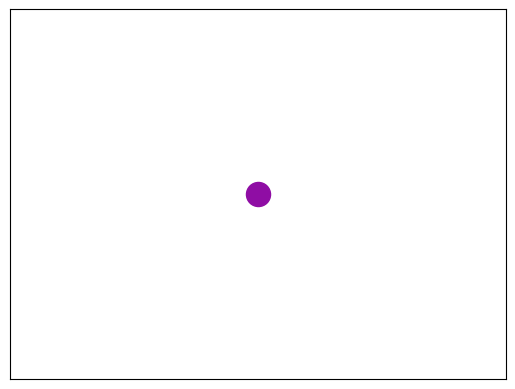

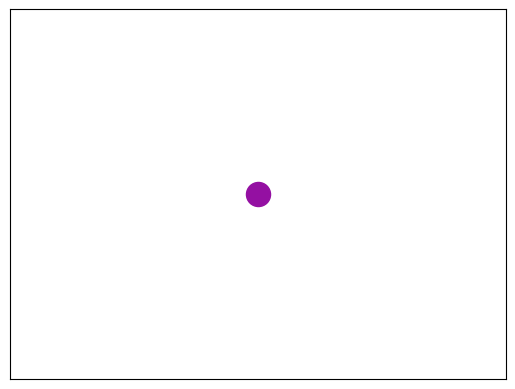

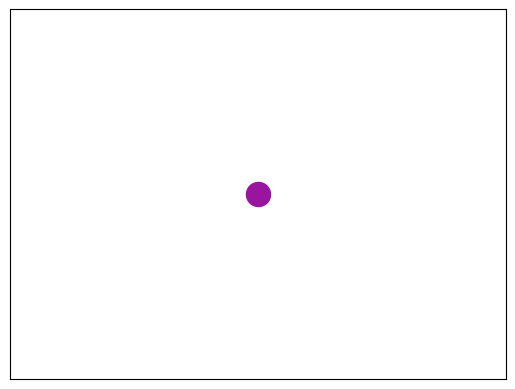

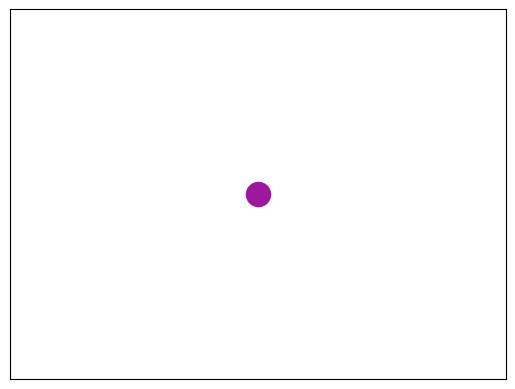

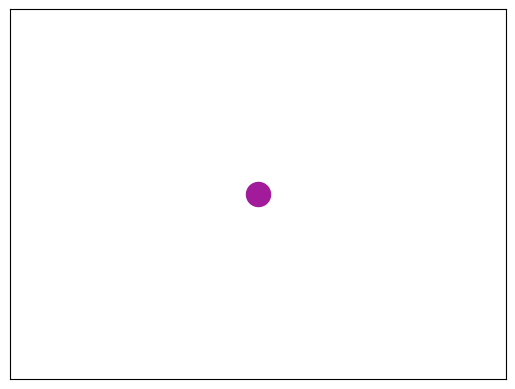

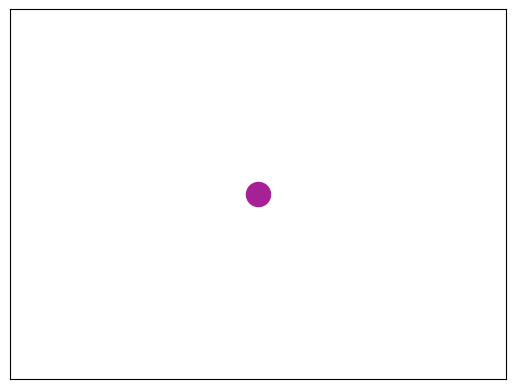

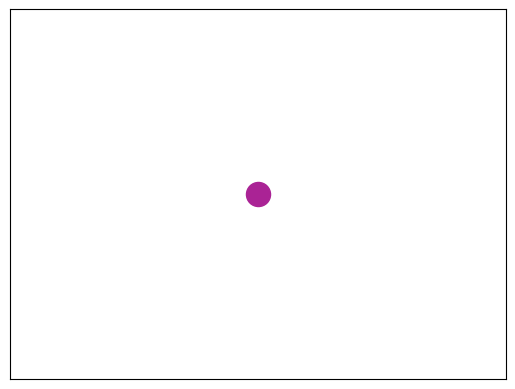

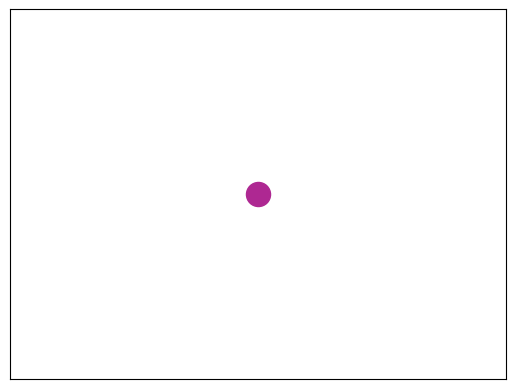

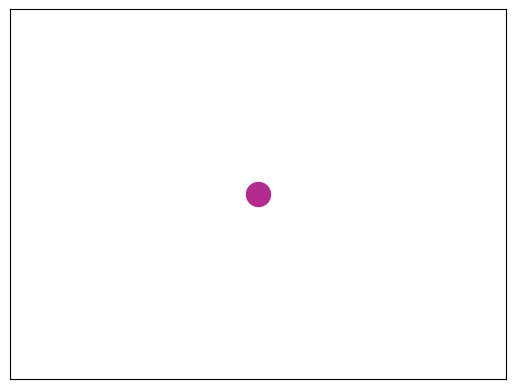

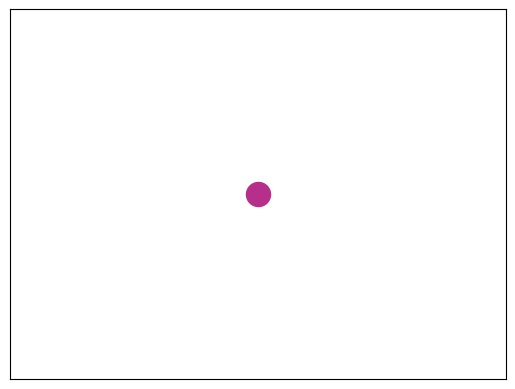

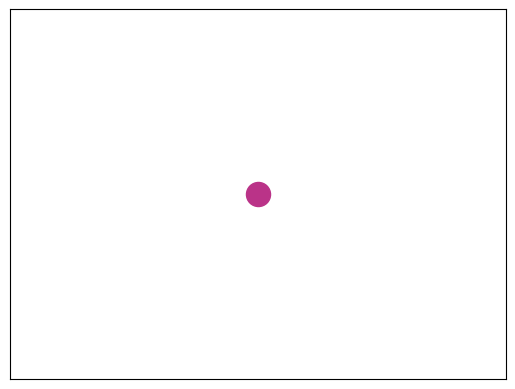

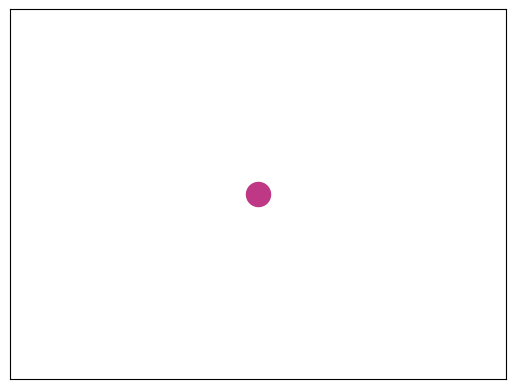

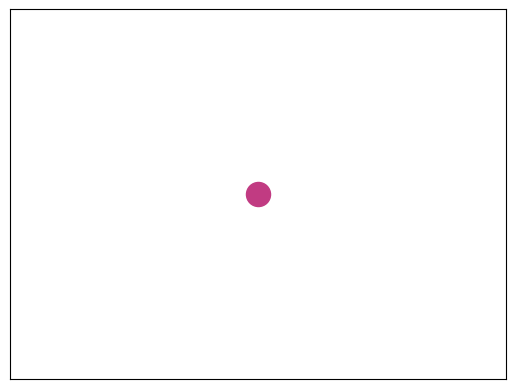

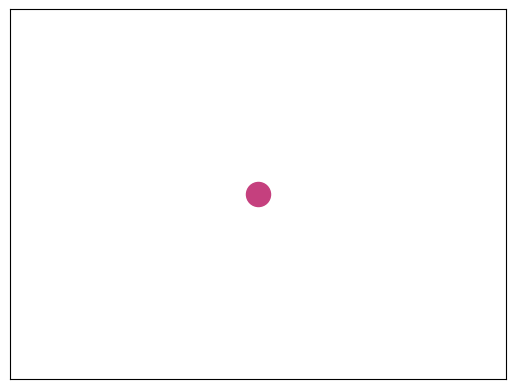

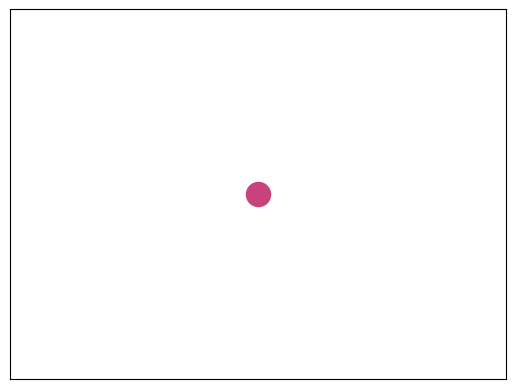

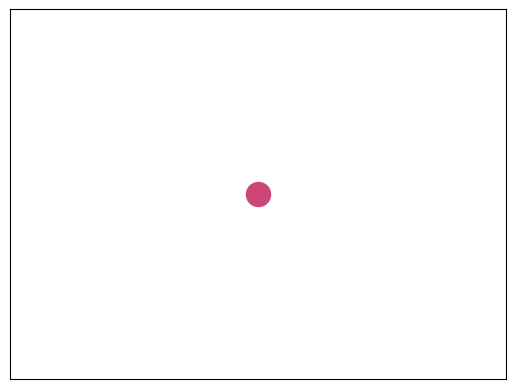

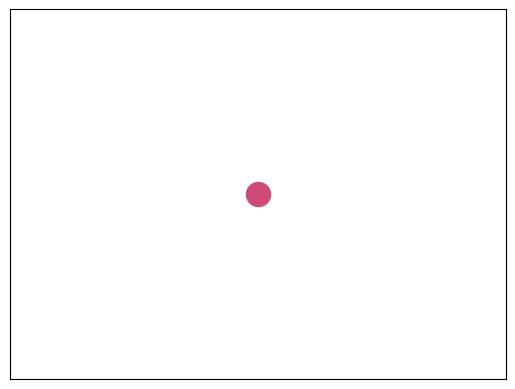

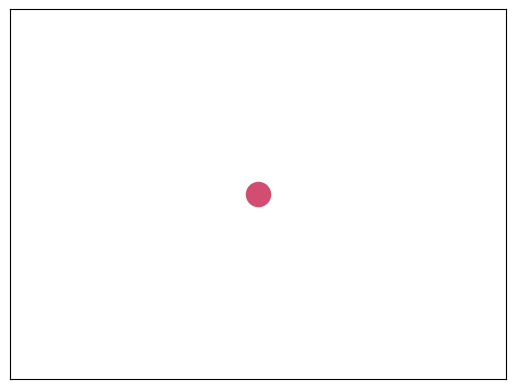

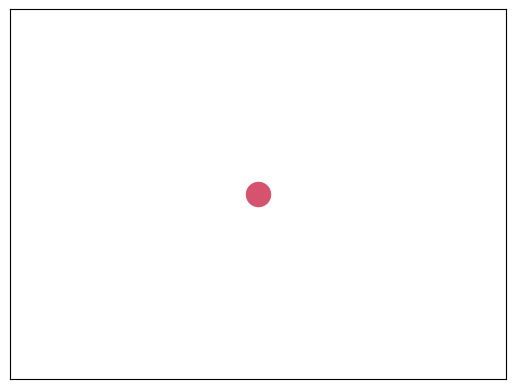

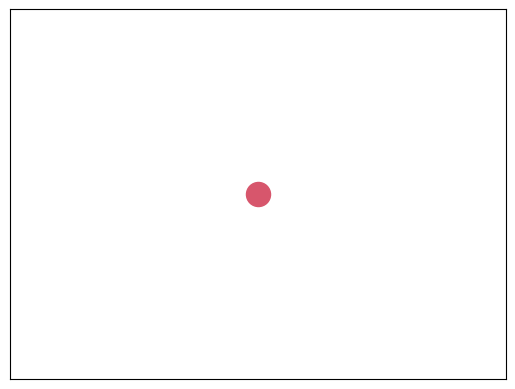

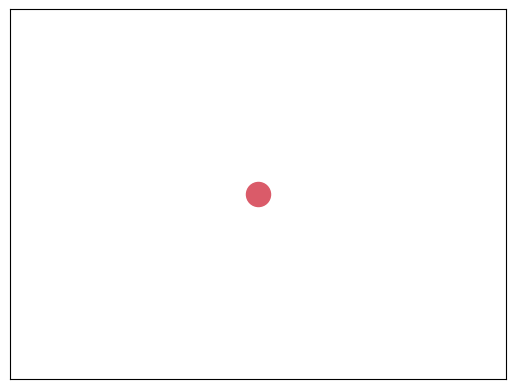

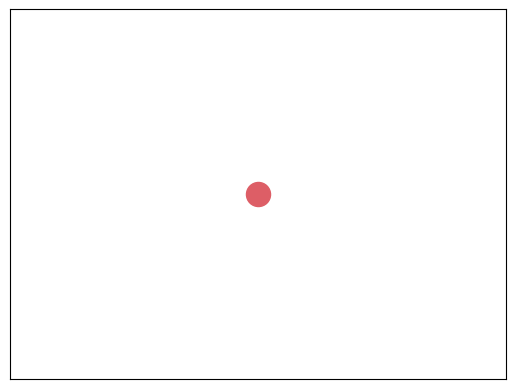

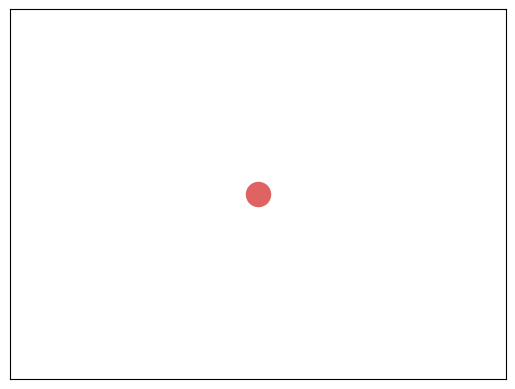

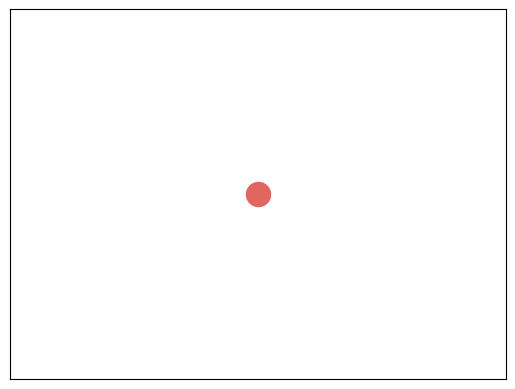

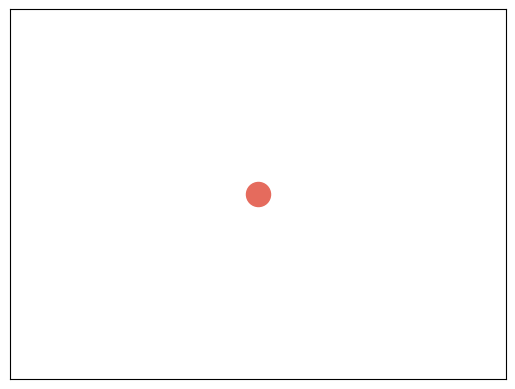

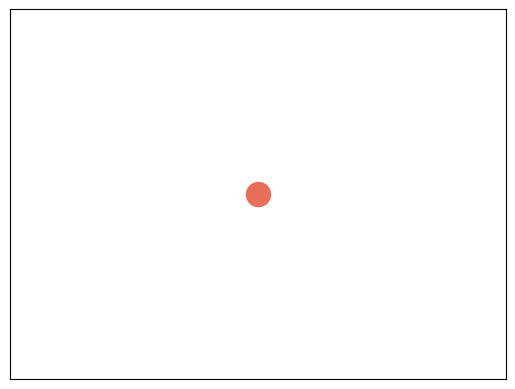

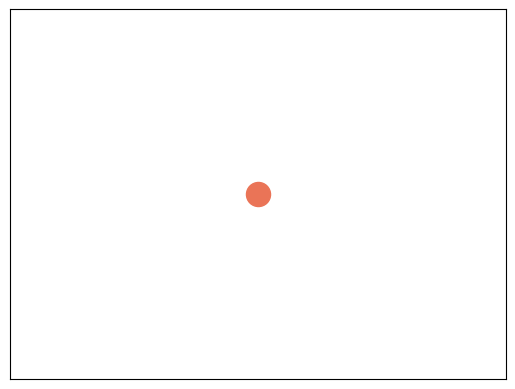

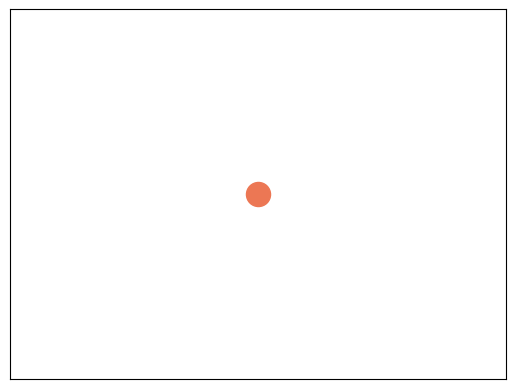

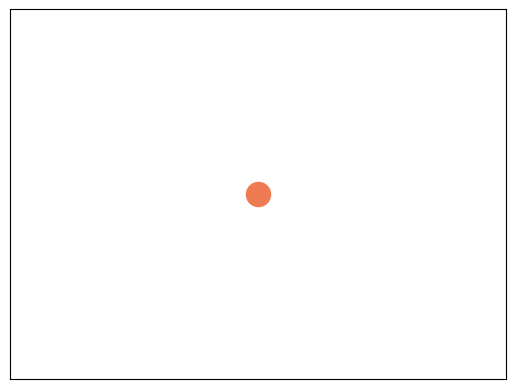

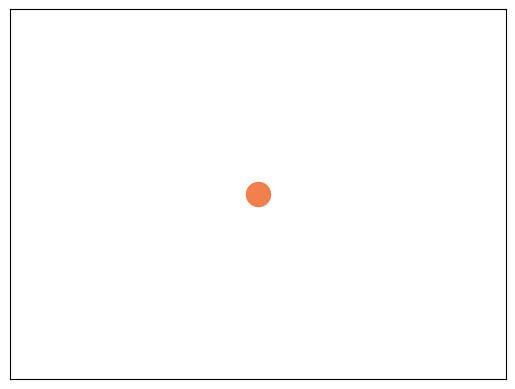

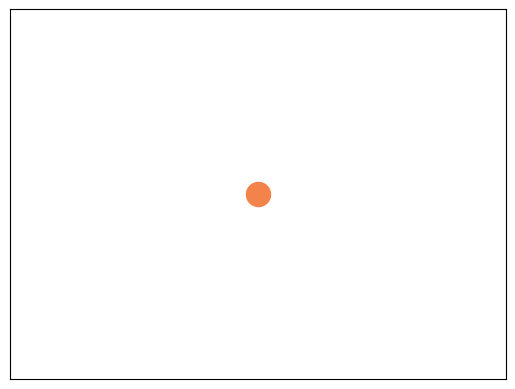

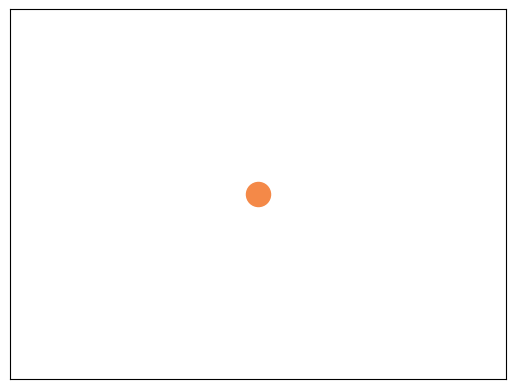

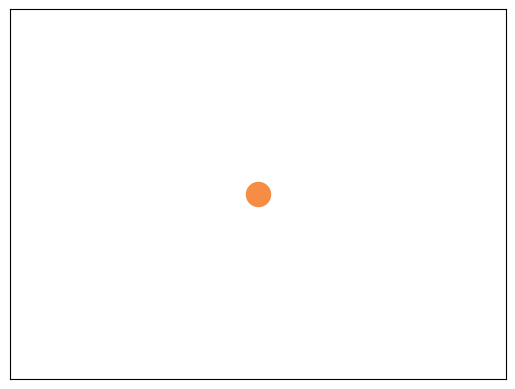

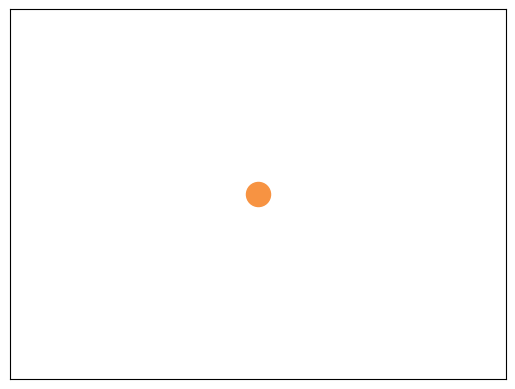

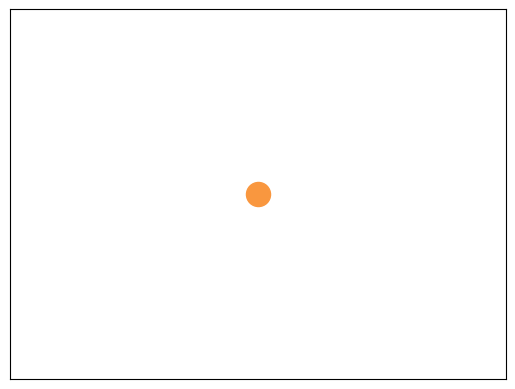

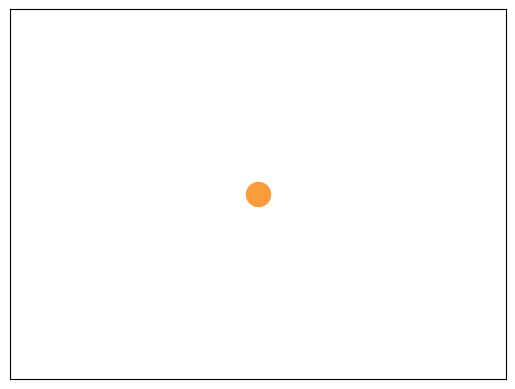

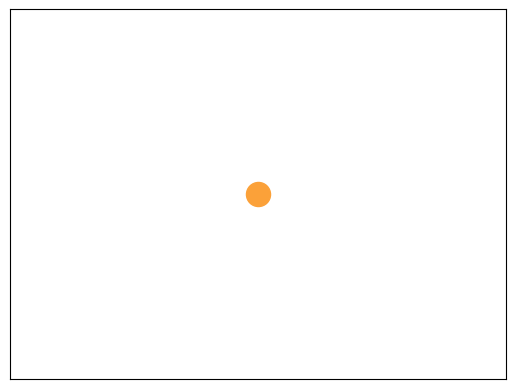

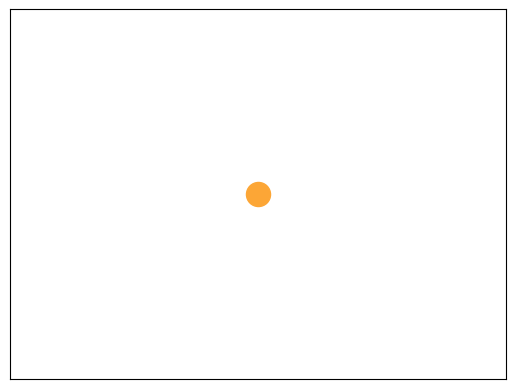

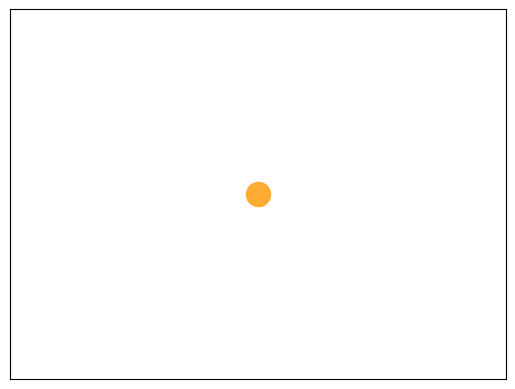

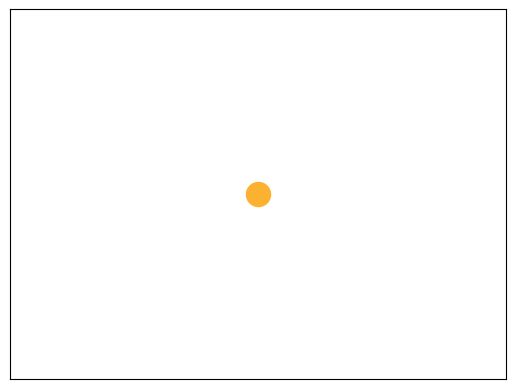

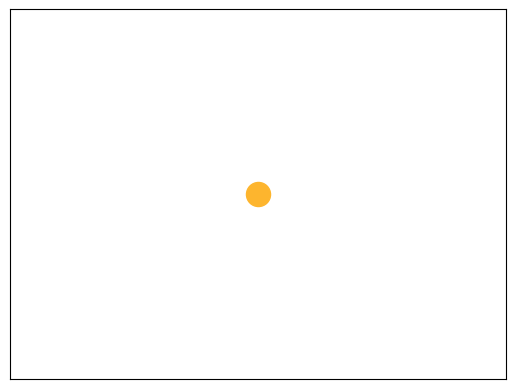

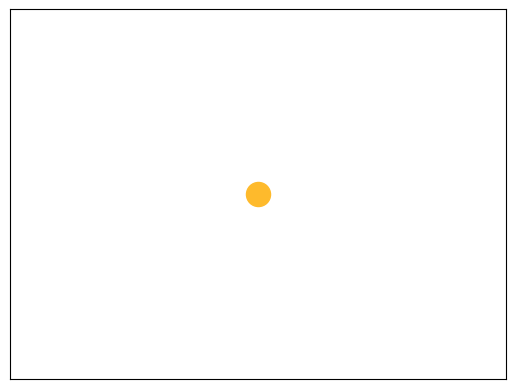

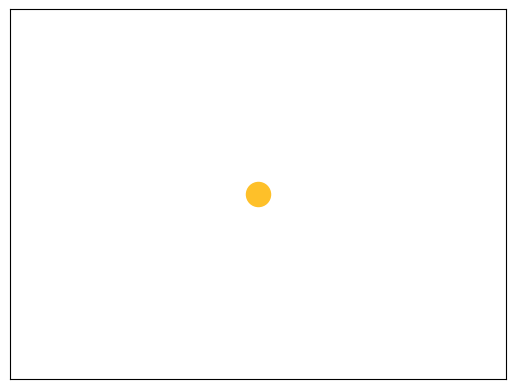

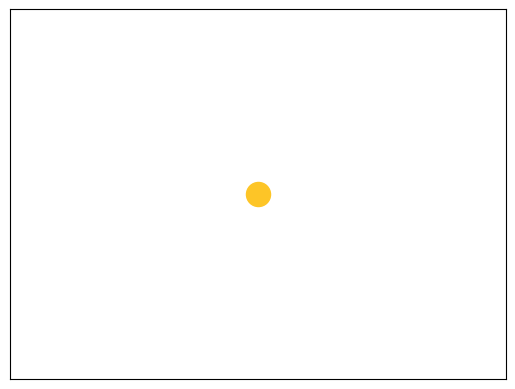

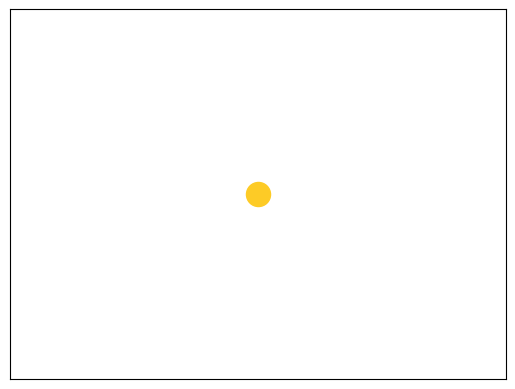

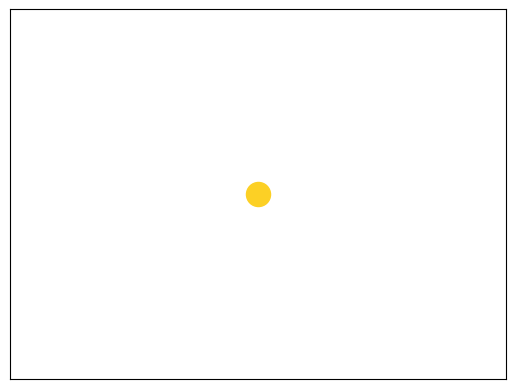

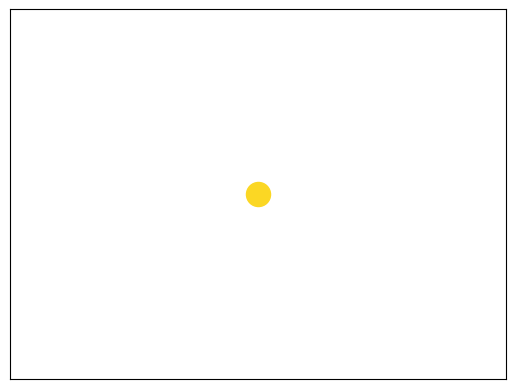

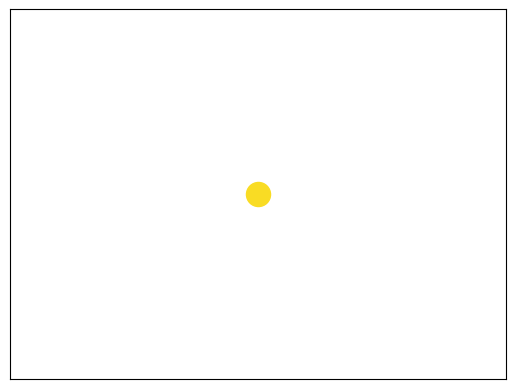

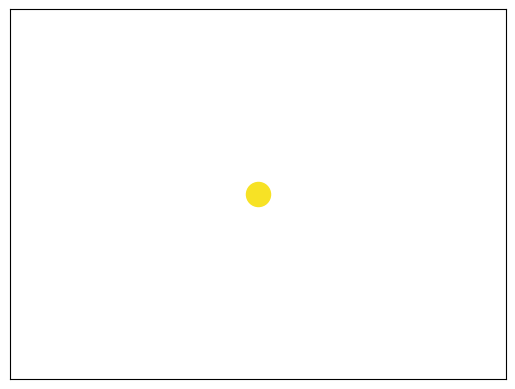

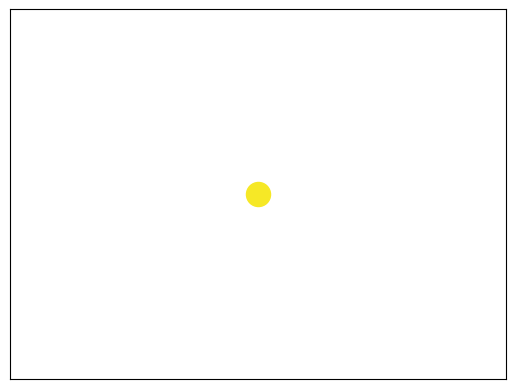

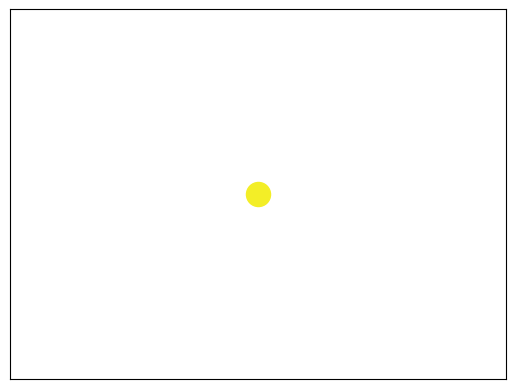

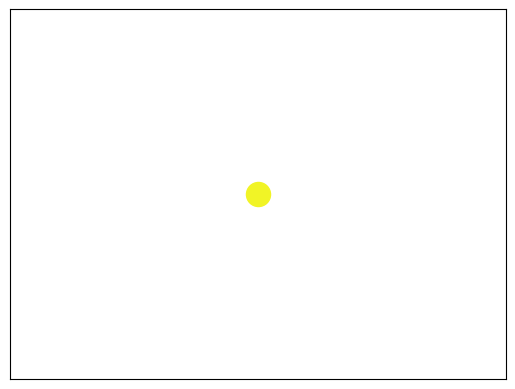

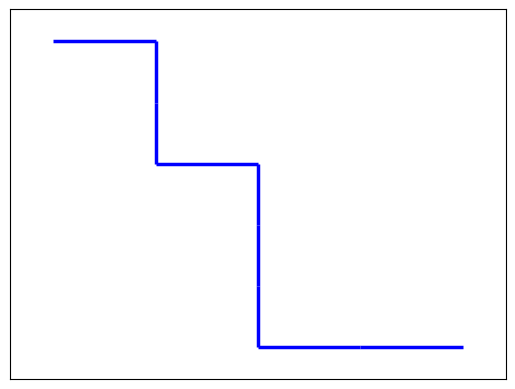

A* Algorithm Search Front Visualization:


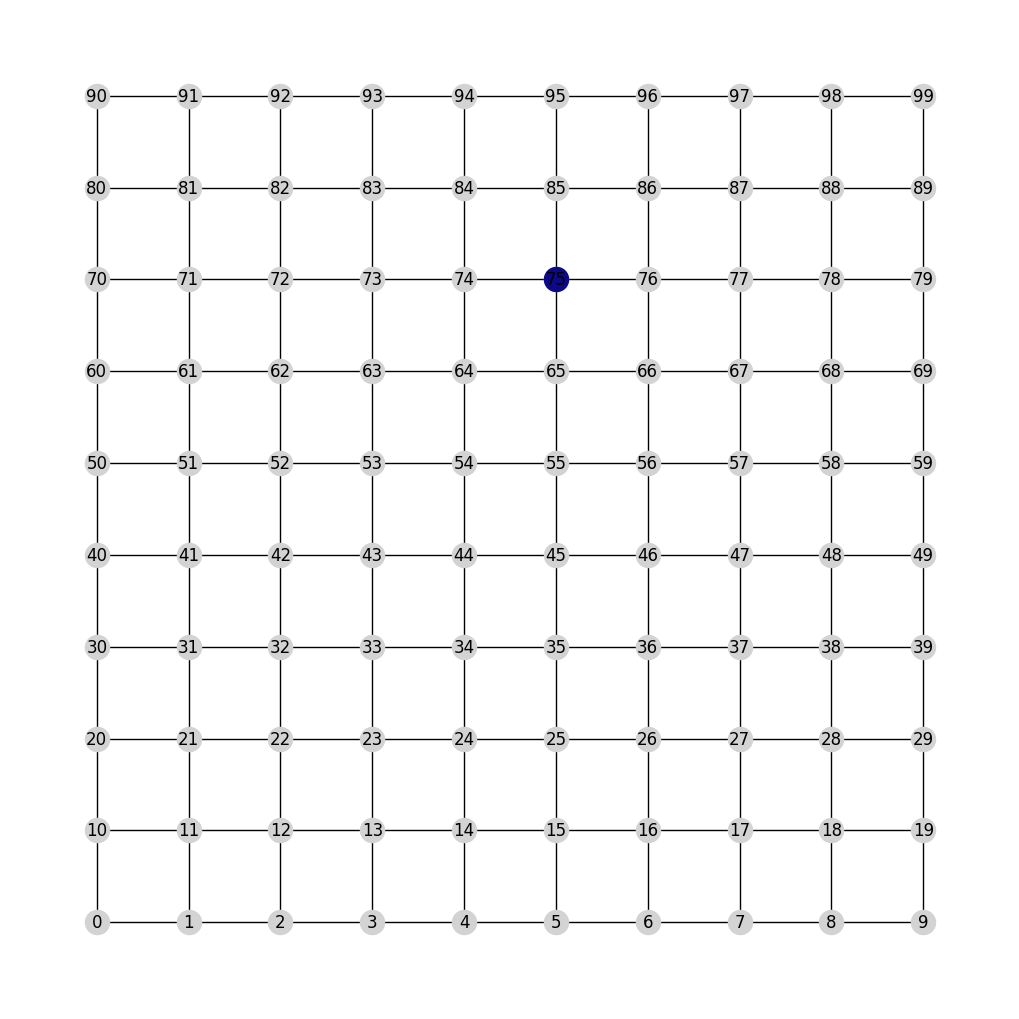

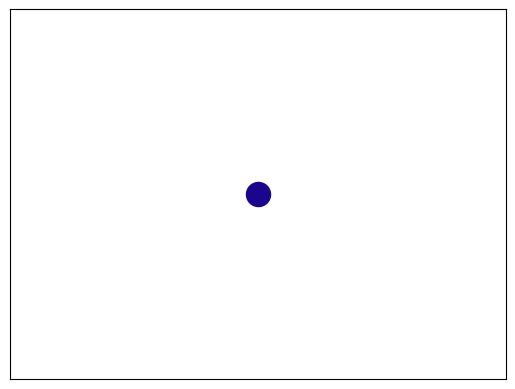

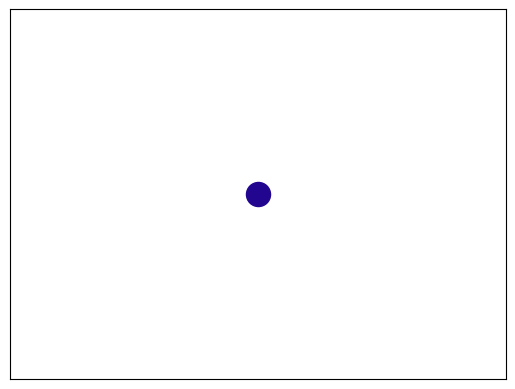

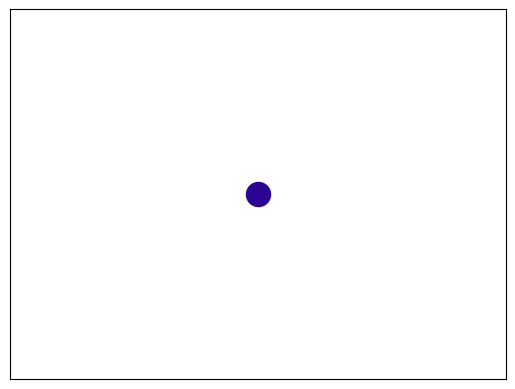

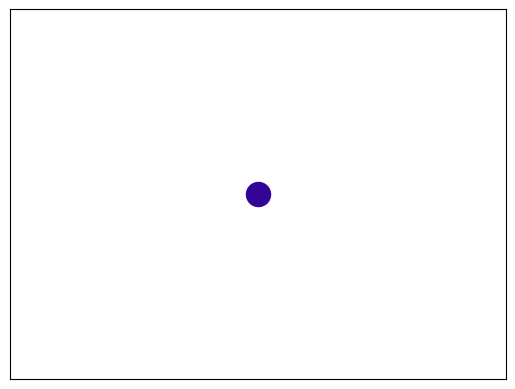

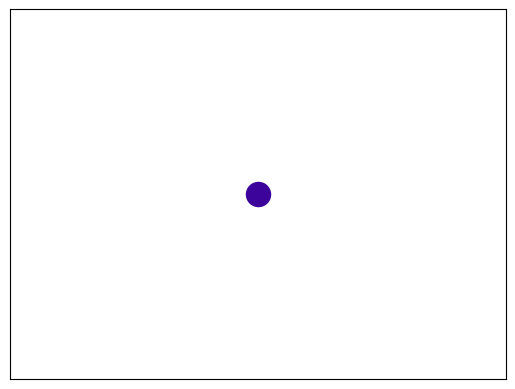

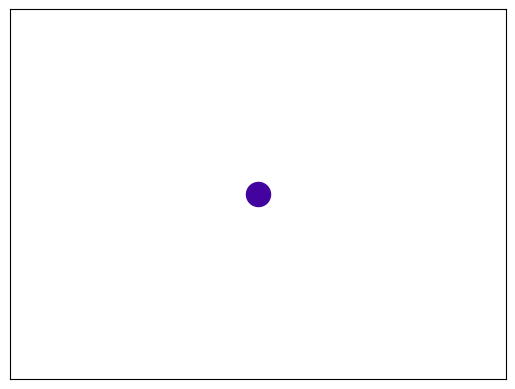

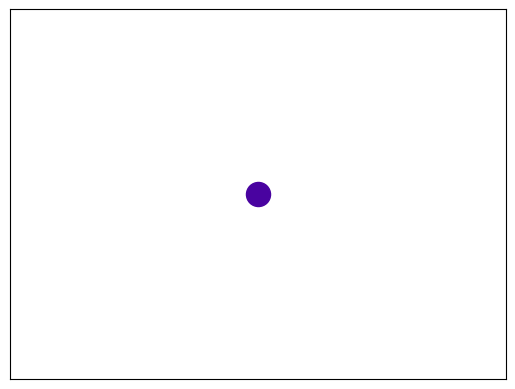

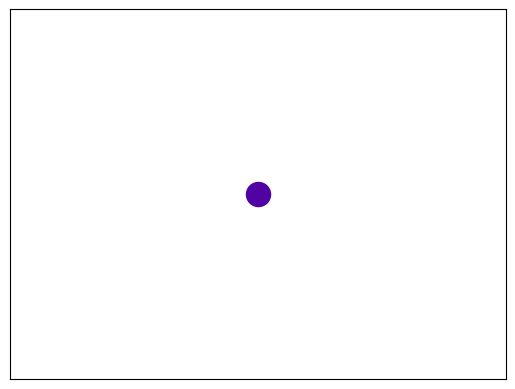

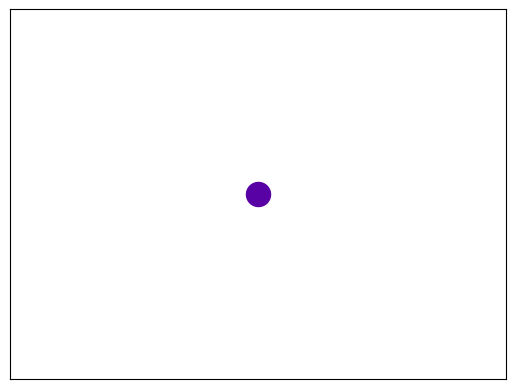

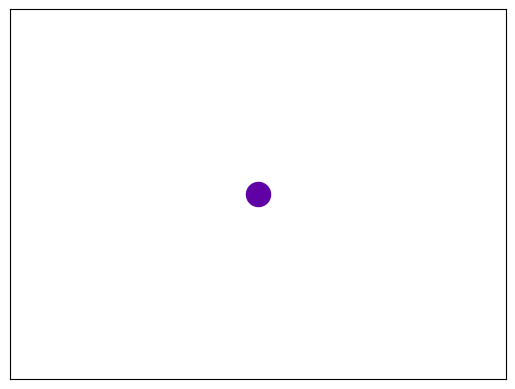

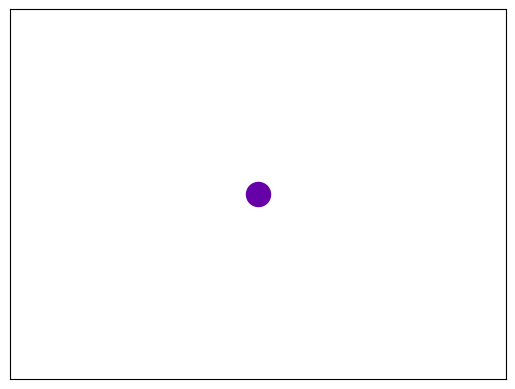

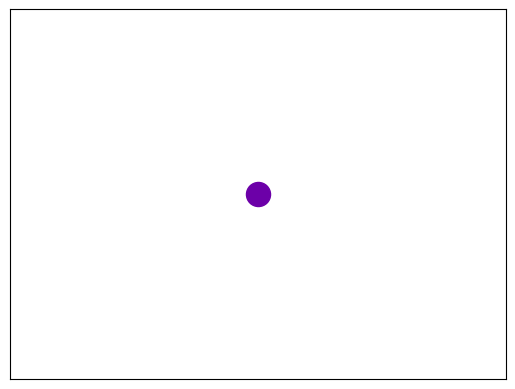

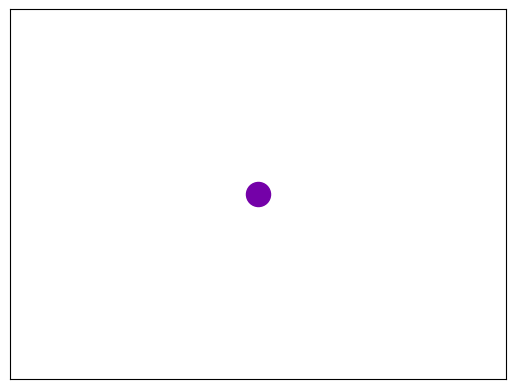

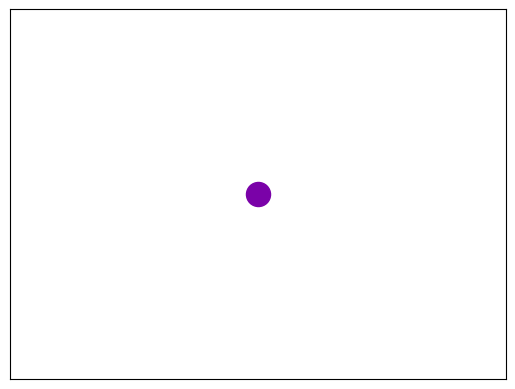

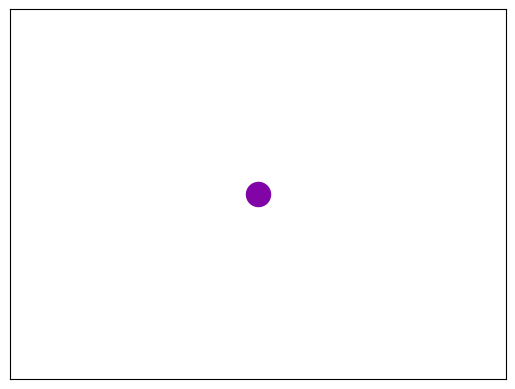

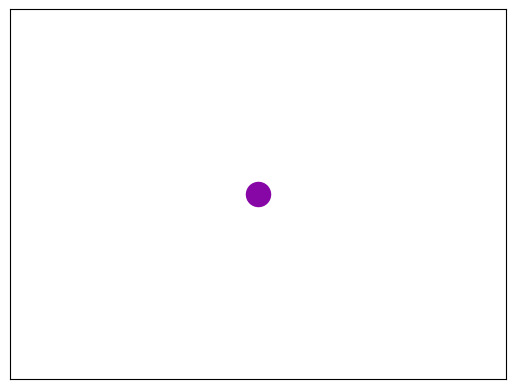

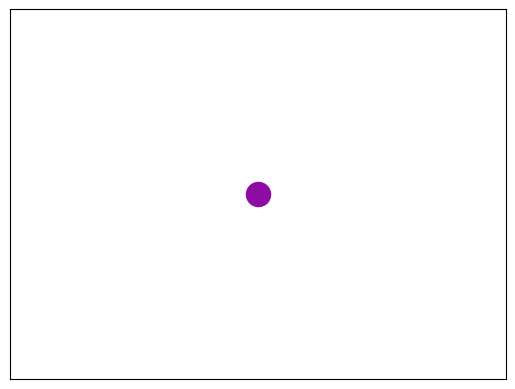

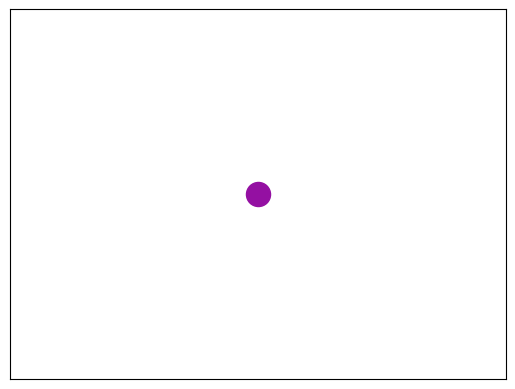

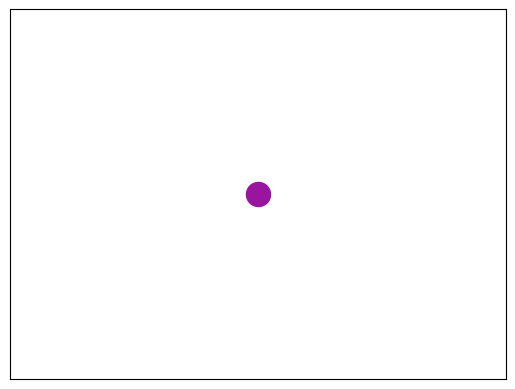

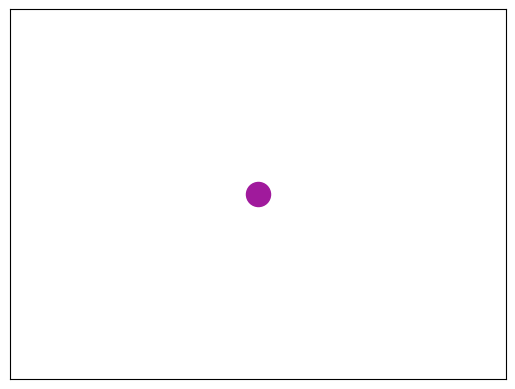

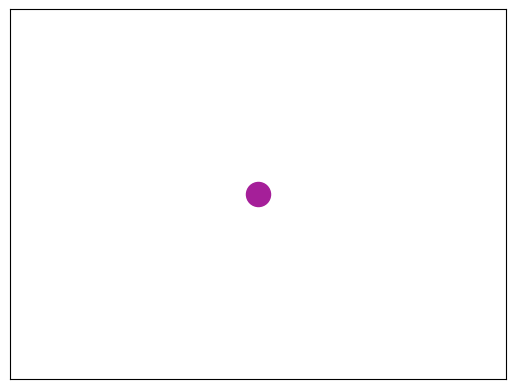

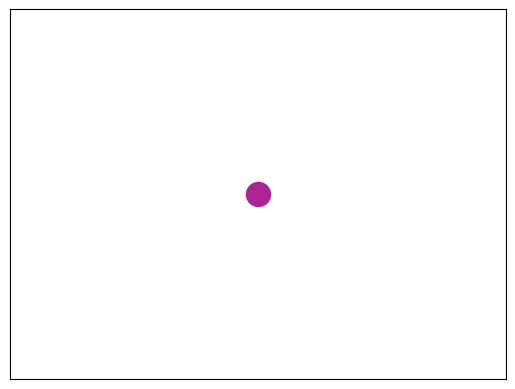

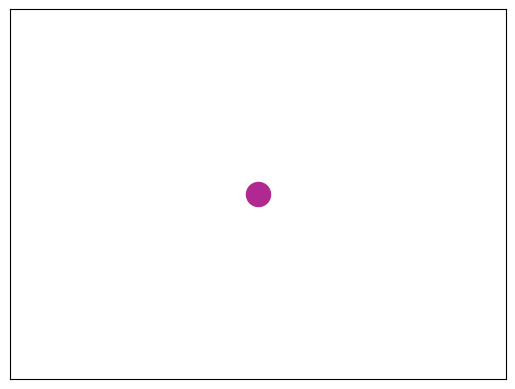

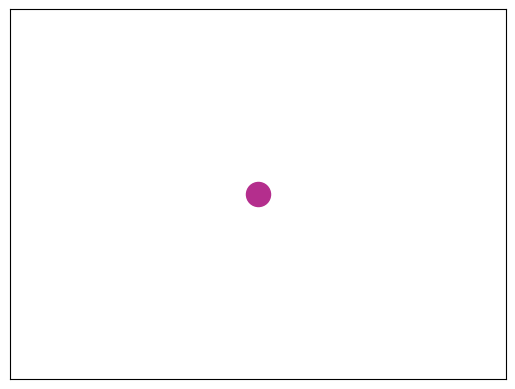

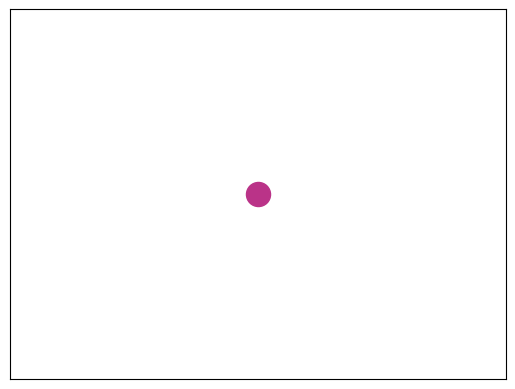

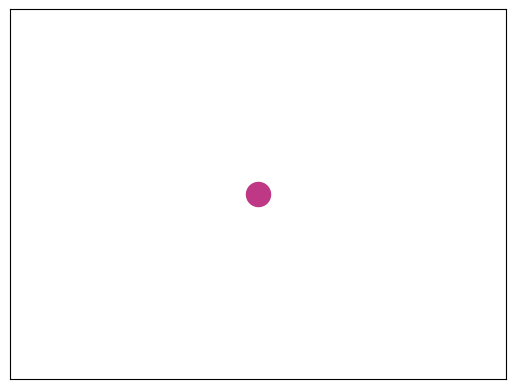

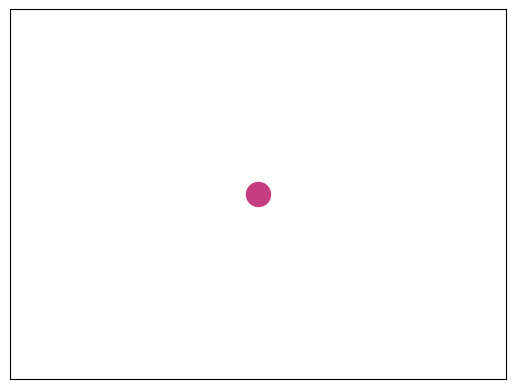

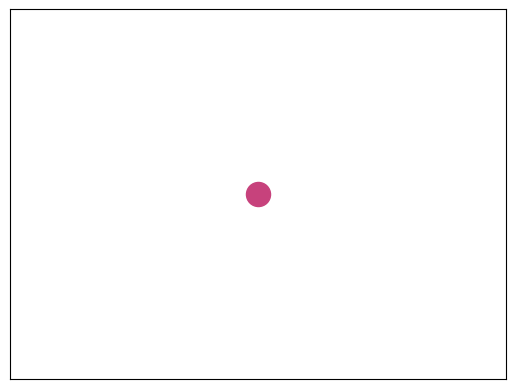

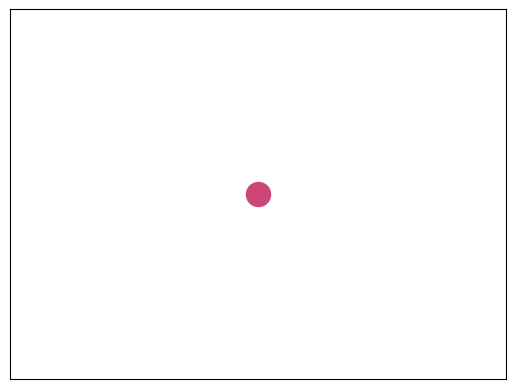

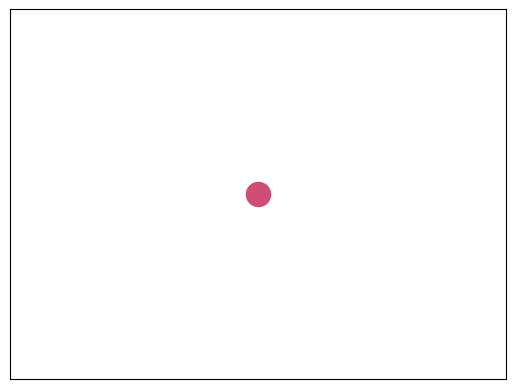

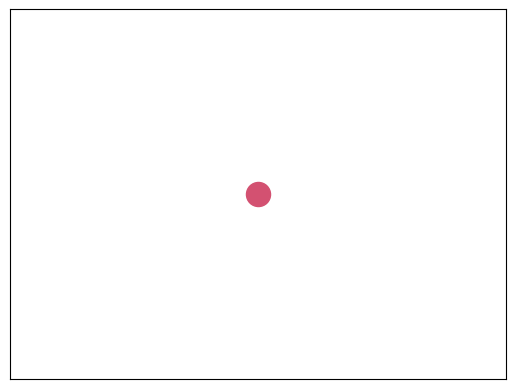

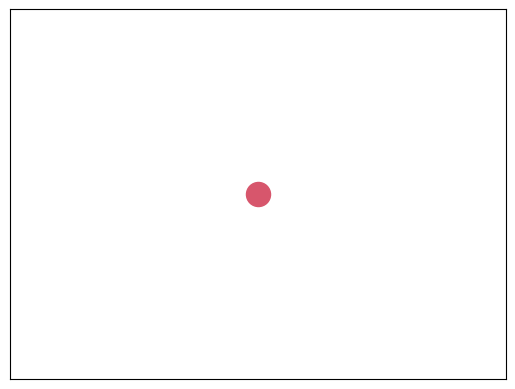

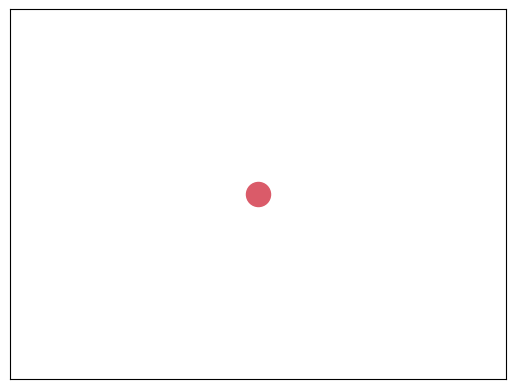

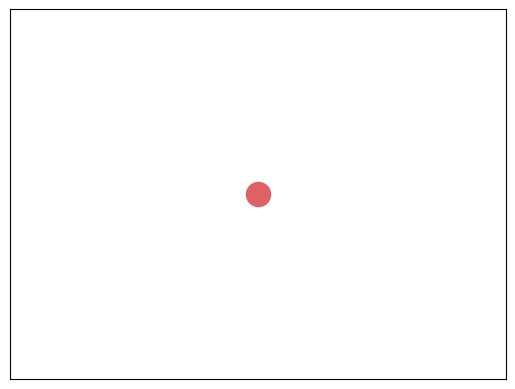

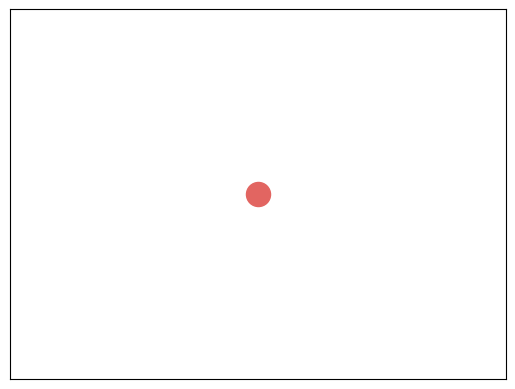

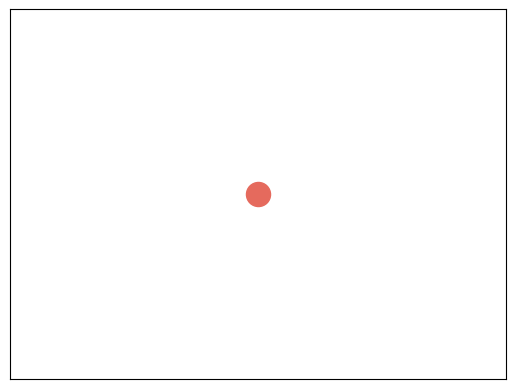

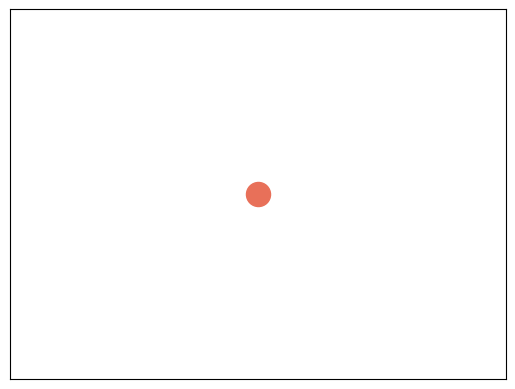

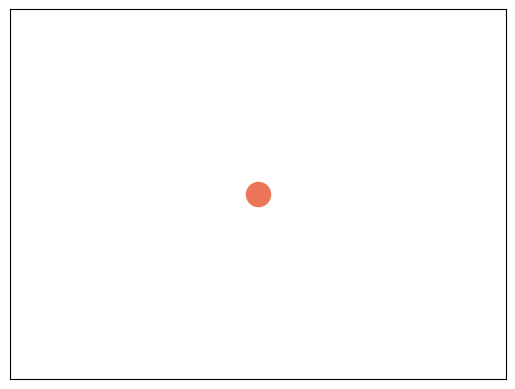

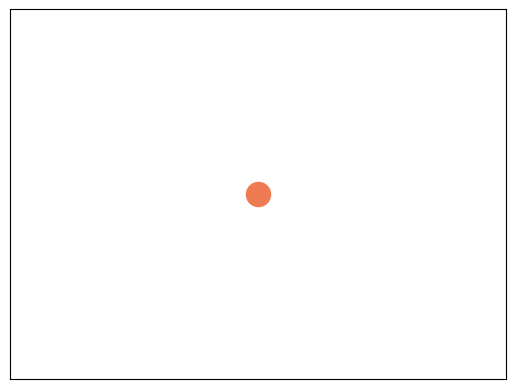

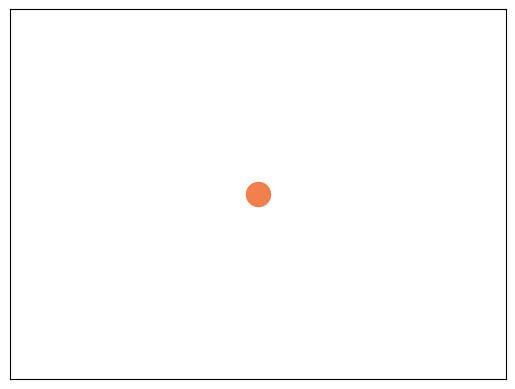

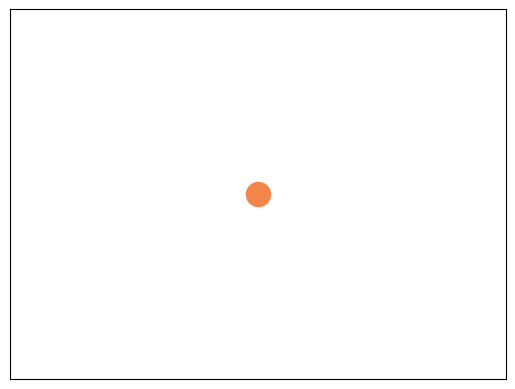

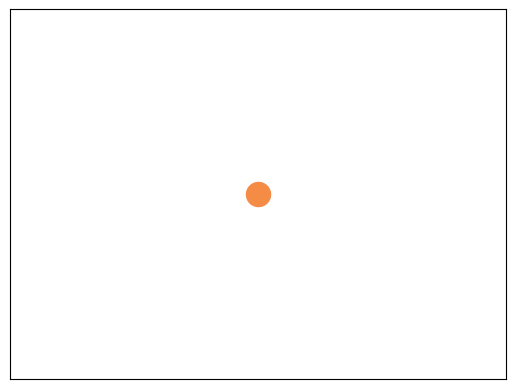

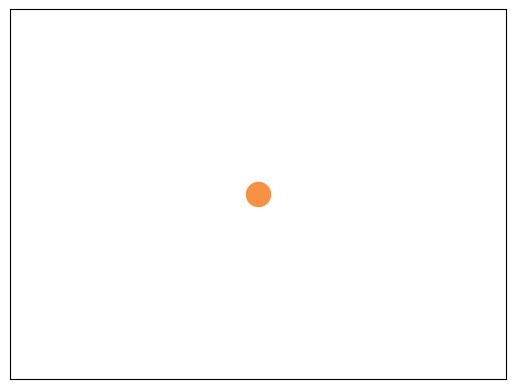

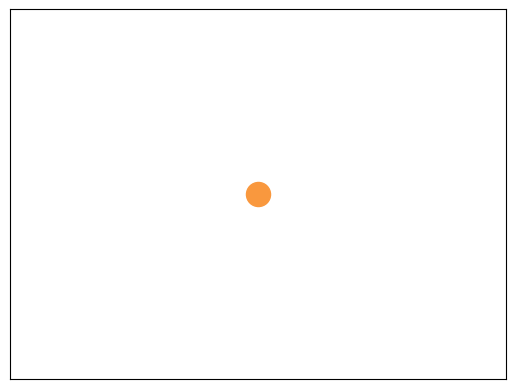

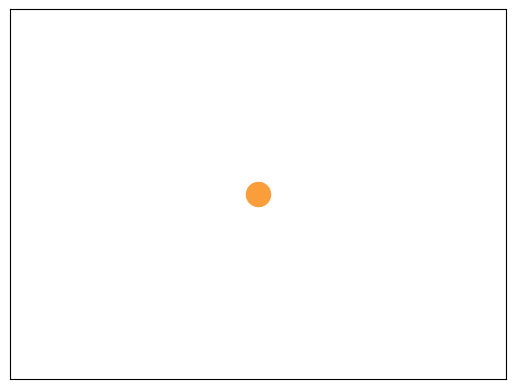

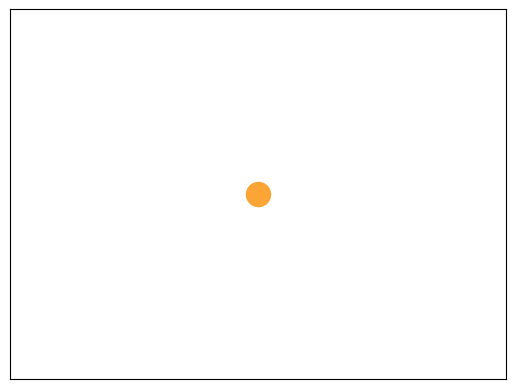

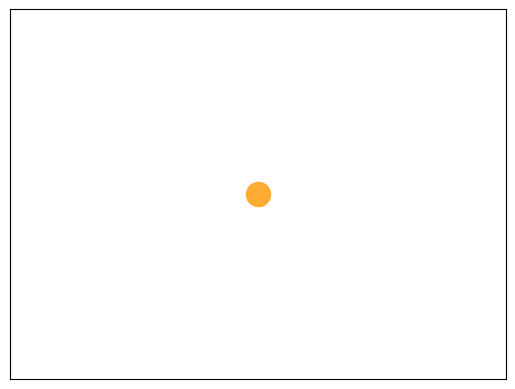

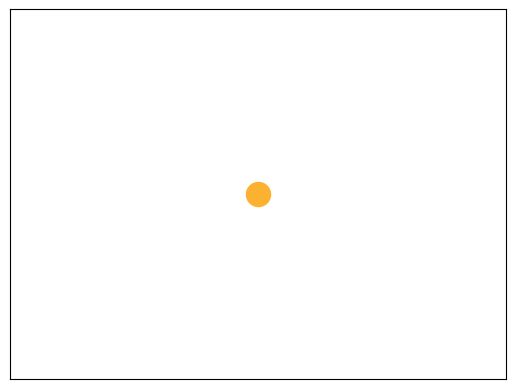

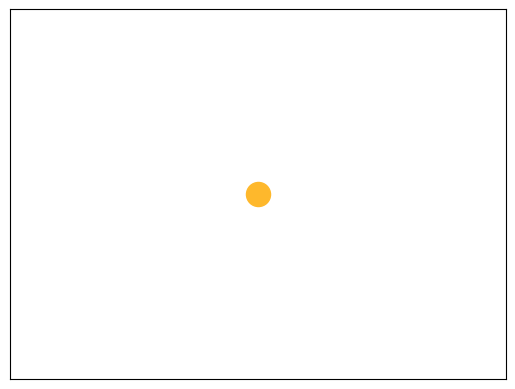

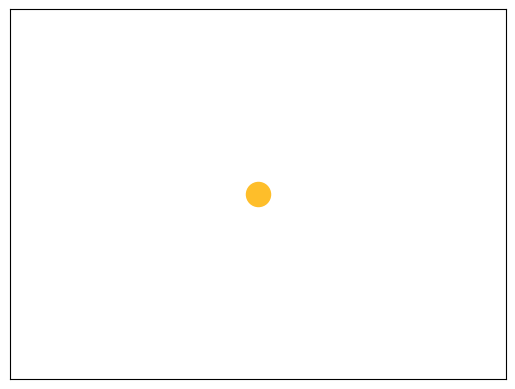

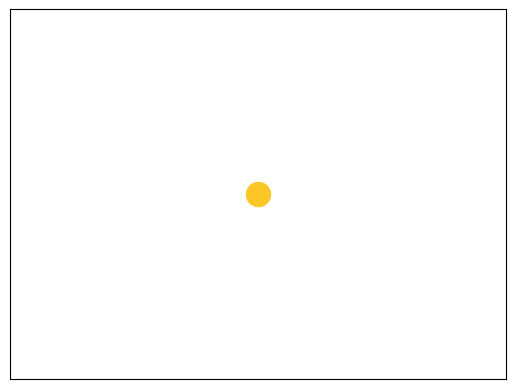

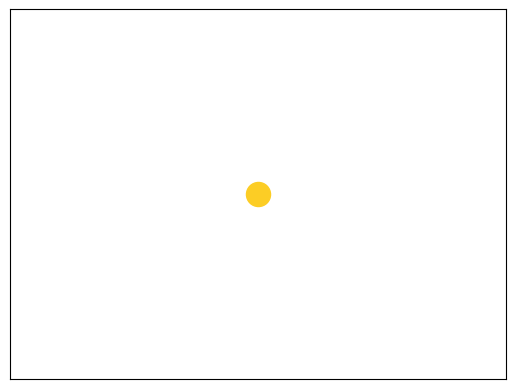

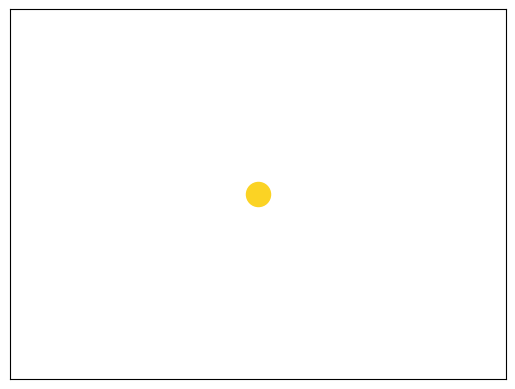

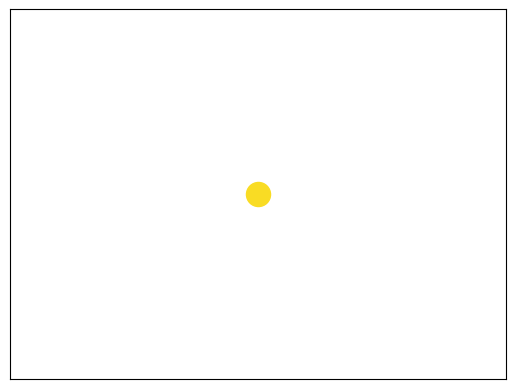

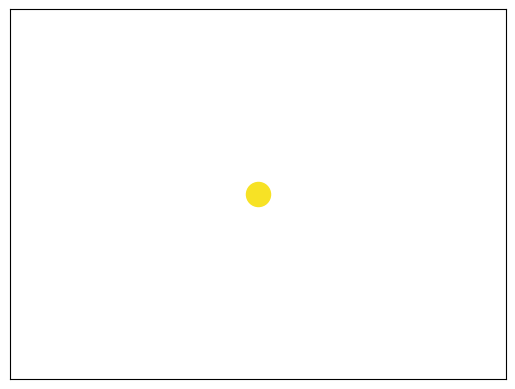

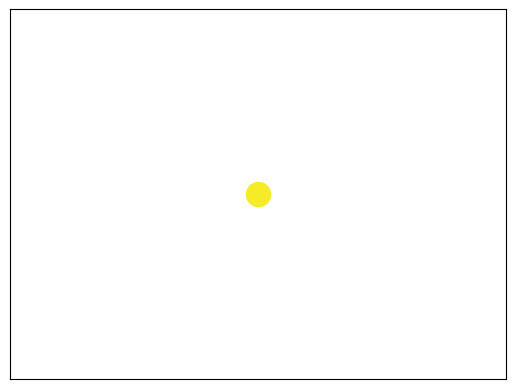

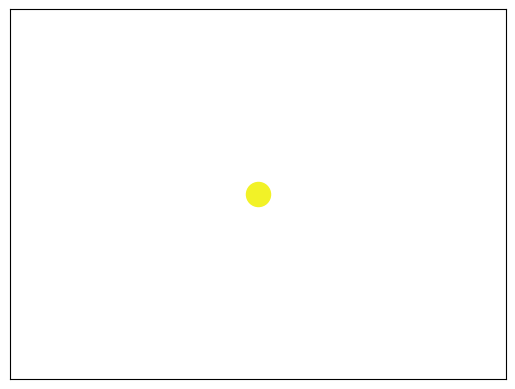

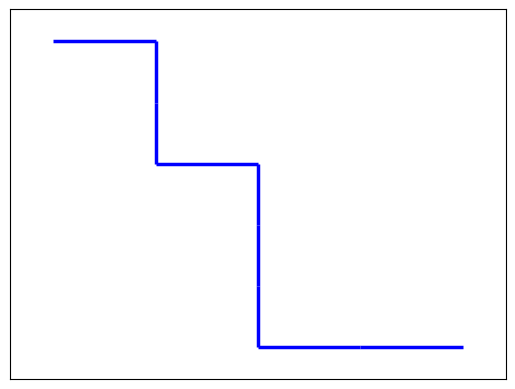

In [1]:
import heapq
import matplotlib.pyplot as plt
import networkx as nx
import random

def heuristic(node, target, positions):
    """Return the straight-line distance between node and target."""
    x1, y1 = positions[node]
    x2, y2 = positions[target]
    return ((x1 - x2)**2 + (y1 - y2)**2) ** 0.5

def priority_search(graph, source, target, positions, use_astar=False):
    """Priority queue-based search with Dijkstra or A*."""
    queue = []  # Priority queue for nodes
    heapq.heappush(queue, (0, source))  # (priority, node)
    
    distances = {node: float('inf') for node in graph.nodes}
    distances[source] = 0
    
    parents = {node: None for node in graph.nodes}  # To reconstruct the path
    
    visited = set()  # Set of visited nodes
    expanded_nodes = []  # List to store the order of expanded nodes (for visualization)
    
    while queue:
        current_priority, current_node = heapq.heappop(queue)
        
        # Skip if already visited
        if current_node in visited:
            continue
        
        visited.add(current_node)
        expanded_nodes.append(current_node)
        
        # If target is reached, stop
        if current_node == target:
            break
        
        # Explore neighbors
        for neighbor in graph.neighbors(current_node):
            edge_weight = graph[current_node][neighbor].get('weight', 1)  # default weight is 1
            
            new_distance = distances[current_node] + edge_weight
            if new_distance < distances[neighbor]:
                distances[neighbor] = new_distance
                parents[neighbor] = current_node
                
                # A* modifies the priority with heuristic (distance + heuristic)
                if use_astar:
                    priority = new_distance + heuristic(neighbor, target, positions)
                else:
                    priority = new_distance  # Dijkstra's prioritizes the distance only
                
                heapq.heappush(queue, (priority, neighbor))
    
    return distances, parents, expanded_nodes

# Reconstruct the path
def reconstruct_path(parents, source, target):
    path = []
    current = target
    while current is not None:
        path.append(current)
        current = parents[current]
    path.reverse()
    return path

# Visualization function
def visualize_search(graph, positions, expanded_nodes, path=None):
    """Visualize the search progress and the final path."""
    plt.figure(figsize=(10, 10))
    
    # Draw nodes and edges
    nx.draw(graph, pos=positions, node_color='lightgray', with_labels=True, node_size=300)
    
    # Draw the expanded nodes in order
    for i, node in enumerate(expanded_nodes):
        color = plt.cm.plasma(i / len(expanded_nodes))  # Color changes as more nodes are explored
        nx.draw_networkx_nodes(graph, pos=positions, nodelist=[node], node_color=[color])
        plt.pause(0.05)  # Add pause to see the progress
    
    # Draw the final path if it exists
    if path:
        nx.draw_networkx_edges(graph, pos=positions, edgelist=list(zip(path, path[1:])), edge_color='blue', width=2.5)
    
    plt.show()

def main():
    G = nx.grid_2d_graph(10, 10)  # 10x10 grid graph
    G = nx.convert_node_labels_to_integers(G)  # Convert nodes to integers
    
    # Add random weights to the edges
    for (u, v) in G.edges():
        G[u][v]['weight'] = random.randint(1, 10)
    
    # Random positions for nodes (or use grid positions)
    positions = {node: (node % 10, node // 10) for node in G.nodes}
    
    # Choose random source and target nodes
    source = random.choice(list(G.nodes))
    target = random.choice(list(G.nodes))
    
    # Run Dijkstra's algorithm
    distances_dijkstra, parents_dijkstra, expanded_dijkstra = priority_search(G, source, target, positions, use_astar=False)
    
    # Run A* algorithm
    distances_astar, parents_astar, expanded_astar = priority_search(G, source, target, positions, use_astar=True)
    
    # Reconstruct paths
    path_dijkstra = reconstruct_path(parents_dijkstra, source, target)
    path_astar = reconstruct_path(parents_astar, source, target)
    
    # Visualize the search fronts
    print("Dijkstra's Algorithm Search Front Visualization:")
    visualize_search(G, positions, expanded_dijkstra, path=path_dijkstra)
    
    print("A* Algorithm Search Front Visualization:")
    visualize_search(G, positions, expanded_astar, path=path_astar)

if __name__ == '__main__':
    main()
